## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   3.337438   229.323405  0.666879  6.123171  1.601413
1  55.636481  1554.303269  0.676600  5.549801  1.602828
2  50.077814  1261.356064  0.736890  4.822868  1.645173
3   5.652043   210.497741  0.209087  6.921963  1.488190
4  56.204953  1616.504061  0.521374  3.052318  1.455459


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9029416	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.8953354	total: 69.9ms	remaining: 34.9s
2:	learn: 0.8873936	total: 70.4ms	remaining: 23.4s
3:	learn: 0.8788060	total: 70.9ms	remaining: 17.7s
4:	learn: 0.8720248	total: 71.3ms	remaining: 14.2s
5:	learn: 0.8646255	total: 71.7ms	remaining: 11.9s
6:	learn: 0.8576757	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8503211	total: 72.6ms	remaining: 9s
8:	learn: 0.8424989	total: 73ms	remaining: 8.04s
9:	learn: 0.8356403	total: 73.4ms	remaining: 7.27s
10:	learn: 0.8293706	total: 73.8ms	remaining: 6.64s
11:	learn: 0.8226469	total: 74.3ms	remaining: 6.11s
12:	learn: 0.8159398	total: 74.7ms	remaining: 5.67s
13:	learn: 0.8084672	total: 75.2ms	remaining: 5.29s
14:	learn: 0.8008717	total: 75.6ms	remaining: 4.96s
15:	learn: 0.7942854	total: 76.1ms	remaining: 4.68s
16:	learn: 0.7864810	total: 76.6ms	remaining: 4.43s
17:	learn: 0.7811544	total: 77.1ms	remaining: 4.2s
18:	learn: 0.7758748	total: 77.4ms	remaining: 4s
1

89:	learn: 0.4474098	total: 108ms	remaining: 1.1s
90:	learn: 0.4433418	total: 109ms	remaining: 1.09s
91:	learn: 0.4401406	total: 109ms	remaining: 1.08s
92:	learn: 0.4371148	total: 110ms	remaining: 1.07s
93:	learn: 0.4342763	total: 110ms	remaining: 1.06s
94:	learn: 0.4311155	total: 111ms	remaining: 1.05s
95:	learn: 0.4284706	total: 111ms	remaining: 1.04s
96:	learn: 0.4255112	total: 112ms	remaining: 1.04s
97:	learn: 0.4217252	total: 112ms	remaining: 1.03s
98:	learn: 0.4189896	total: 112ms	remaining: 1.02s
99:	learn: 0.4177445	total: 113ms	remaining: 1.01s
100:	learn: 0.4145976	total: 113ms	remaining: 1.01s
101:	learn: 0.4121480	total: 113ms	remaining: 999ms
102:	learn: 0.4090813	total: 114ms	remaining: 990ms
103:	learn: 0.4063536	total: 114ms	remaining: 983ms
104:	learn: 0.4039214	total: 115ms	remaining: 976ms
105:	learn: 0.4014206	total: 115ms	remaining: 970ms
106:	learn: 0.3994701	total: 115ms	remaining: 963ms
107:	learn: 0.3961844	total: 116ms	remaining: 955ms
108:	learn: 0.3930866	to

280:	learn: 0.1895800	total: 186ms	remaining: 476ms
281:	learn: 0.1893340	total: 187ms	remaining: 475ms
282:	learn: 0.1890738	total: 187ms	remaining: 474ms
283:	learn: 0.1888475	total: 188ms	remaining: 473ms
284:	learn: 0.1885834	total: 188ms	remaining: 471ms
285:	learn: 0.1883126	total: 188ms	remaining: 470ms
286:	learn: 0.1880750	total: 189ms	remaining: 468ms
287:	learn: 0.1878411	total: 189ms	remaining: 467ms
288:	learn: 0.1876090	total: 189ms	remaining: 465ms
289:	learn: 0.1873797	total: 189ms	remaining: 464ms
290:	learn: 0.1871465	total: 190ms	remaining: 463ms
291:	learn: 0.1869234	total: 190ms	remaining: 461ms
292:	learn: 0.1867030	total: 191ms	remaining: 460ms
293:	learn: 0.1864636	total: 191ms	remaining: 459ms
294:	learn: 0.1861700	total: 192ms	remaining: 458ms
295:	learn: 0.1859618	total: 192ms	remaining: 456ms
296:	learn: 0.1856133	total: 192ms	remaining: 455ms
297:	learn: 0.1853932	total: 193ms	remaining: 454ms
298:	learn: 0.1852035	total: 193ms	remaining: 453ms
299:	learn: 

523:	learn: 0.0773230	total: 290ms	remaining: 263ms
524:	learn: 0.0770507	total: 290ms	remaining: 263ms
525:	learn: 0.0767846	total: 291ms	remaining: 262ms
526:	learn: 0.0763759	total: 291ms	remaining: 261ms
527:	learn: 0.0761261	total: 292ms	remaining: 261ms
528:	learn: 0.0758921	total: 292ms	remaining: 260ms
529:	learn: 0.0754963	total: 293ms	remaining: 260ms
530:	learn: 0.0752511	total: 293ms	remaining: 259ms
531:	learn: 0.0750104	total: 293ms	remaining: 258ms
532:	learn: 0.0747855	total: 294ms	remaining: 257ms
533:	learn: 0.0743917	total: 294ms	remaining: 257ms
534:	learn: 0.0741723	total: 295ms	remaining: 256ms
535:	learn: 0.0739583	total: 295ms	remaining: 256ms
536:	learn: 0.0735623	total: 296ms	remaining: 255ms
537:	learn: 0.0733538	total: 296ms	remaining: 254ms
538:	learn: 0.0730734	total: 297ms	remaining: 254ms
539:	learn: 0.0728060	total: 297ms	remaining: 253ms
540:	learn: 0.0726044	total: 297ms	remaining: 252ms
541:	learn: 0.0723437	total: 298ms	remaining: 252ms
542:	learn: 

704:	learn: 0.0460530	total: 368ms	remaining: 154ms
705:	learn: 0.0458694	total: 369ms	remaining: 153ms
706:	learn: 0.0458296	total: 369ms	remaining: 153ms
707:	learn: 0.0458021	total: 369ms	remaining: 152ms
708:	learn: 0.0456050	total: 370ms	remaining: 152ms
709:	learn: 0.0455749	total: 370ms	remaining: 151ms
710:	learn: 0.0455357	total: 371ms	remaining: 151ms
711:	learn: 0.0455060	total: 371ms	remaining: 150ms
712:	learn: 0.0454717	total: 371ms	remaining: 149ms
713:	learn: 0.0452605	total: 371ms	remaining: 149ms
714:	learn: 0.0452221	total: 372ms	remaining: 148ms
715:	learn: 0.0451931	total: 372ms	remaining: 148ms
716:	learn: 0.0450072	total: 372ms	remaining: 147ms
717:	learn: 0.0449730	total: 373ms	remaining: 146ms
718:	learn: 0.0448069	total: 373ms	remaining: 146ms
719:	learn: 0.0447735	total: 374ms	remaining: 145ms
720:	learn: 0.0446110	total: 374ms	remaining: 145ms
721:	learn: 0.0444662	total: 375ms	remaining: 144ms
722:	learn: 0.0443072	total: 375ms	remaining: 144ms
723:	learn: 

951:	learn: 0.0252542	total: 471ms	remaining: 23.8ms
952:	learn: 0.0252435	total: 472ms	remaining: 23.3ms
953:	learn: 0.0250933	total: 472ms	remaining: 22.8ms
954:	learn: 0.0250784	total: 473ms	remaining: 22.3ms
955:	learn: 0.0249915	total: 473ms	remaining: 21.8ms
956:	learn: 0.0249811	total: 474ms	remaining: 21.3ms
957:	learn: 0.0248184	total: 474ms	remaining: 20.8ms
958:	learn: 0.0248039	total: 475ms	remaining: 20.3ms
959:	learn: 0.0247424	total: 475ms	remaining: 19.8ms
960:	learn: 0.0246955	total: 475ms	remaining: 19.3ms
961:	learn: 0.0245362	total: 476ms	remaining: 18.8ms
962:	learn: 0.0245219	total: 476ms	remaining: 18.3ms
963:	learn: 0.0244759	total: 477ms	remaining: 17.8ms
964:	learn: 0.0243197	total: 477ms	remaining: 17.3ms
965:	learn: 0.0241909	total: 478ms	remaining: 16.8ms
966:	learn: 0.0241461	total: 478ms	remaining: 16.3ms
967:	learn: 0.0240866	total: 479ms	remaining: 15.8ms
968:	learn: 0.0240285	total: 479ms	remaining: 15.3ms
969:	learn: 0.0239580	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

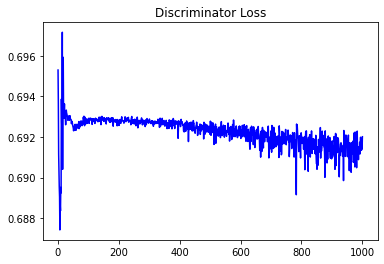

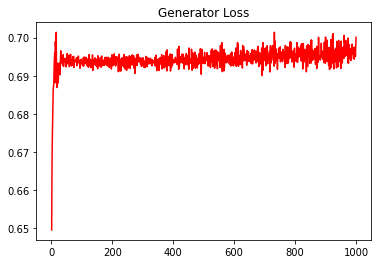

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6427367734841632


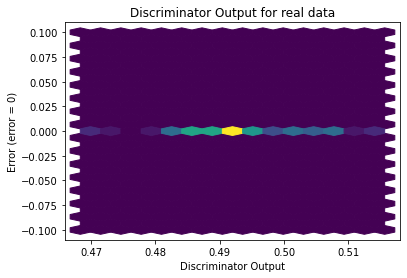

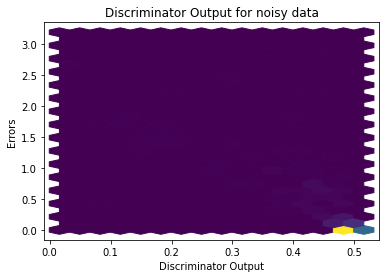

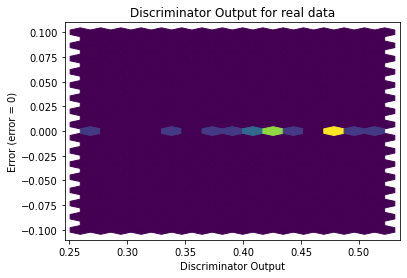

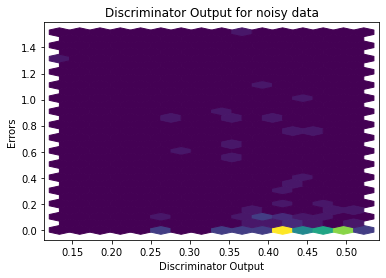

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


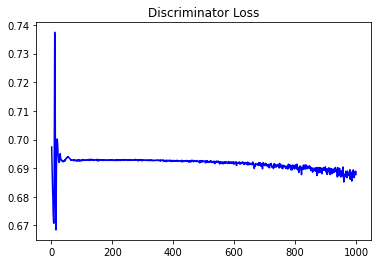

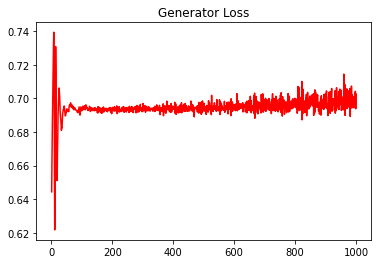

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5807502385098541


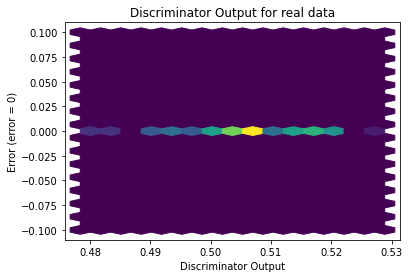

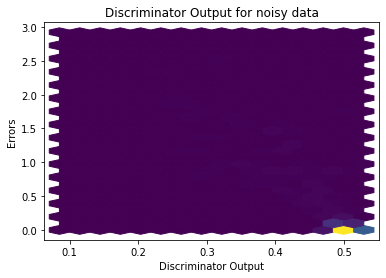

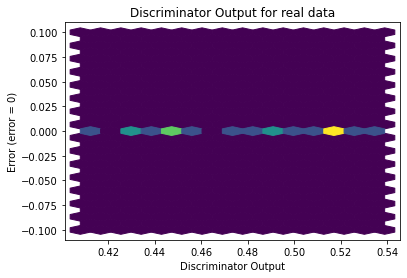

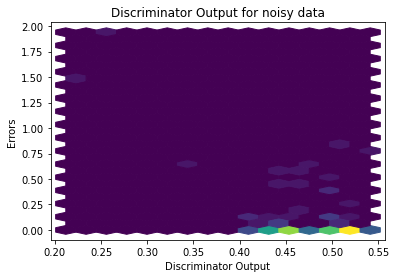

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1520]], requires_grad=True)
